Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<h2 style="color:purple">Data exploration and visualization</h2>

In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

**Average numbers for all columns** 

In [5]:
df.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Impact of salary on employee retention**

<AxesSubplot:xlabel='salary'>

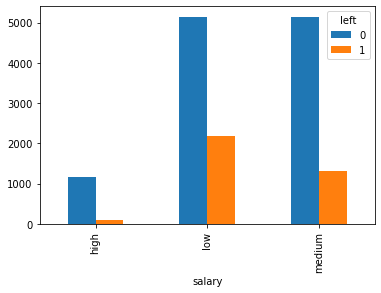

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<AxesSubplot:xlabel='Department'>

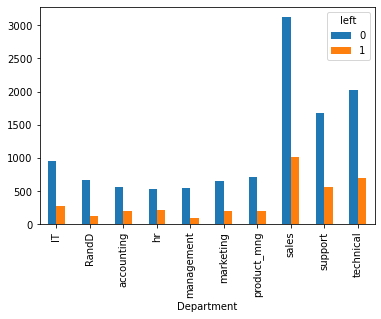

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [10]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [11]:
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [12]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [13]:
X = df_with_dummies
X.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [14]:
y = df.left

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Accuracy of the model**

In [28]:
from pycaret.utils import version
version()

'2.3.0'

## PyCaret 

### Classification

In [19]:
model.score(X_test,y_test)

0.7687619047619048

In [ ]:
from pycaret.datasets import get_data
iris = get_data('iris')
from pycaret.classification import *
exp_name = setup(data = iris,  target = 'species')

In [1]:
from pycaret.datasets import get_data

In [2]:
iris = get_data('iris')

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
from pycaret.classification import *

In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hnour\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [4]:
# Setting up the enviroments
exp_name = setup(data = iris,  target = 'species')

In [5]:
# compare models 
compare_models()

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

#### Creating the model

In [19]:
# creating the model 
qda =  create_model ('qda')
# It provides cross validataion of 10 runs 

In [20]:
tuned_qda = tune_model (qda, optimize= 'Accuracy')

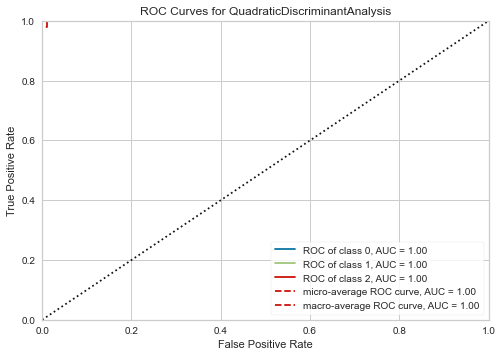

In [21]:
plot_model(qda)

In [22]:
rf =  create_model ('rf')

#### Tuning the model

In [23]:
tuned_rf = tune_model (rf, optimize= 'Accuracy')

#### Plotting the model 

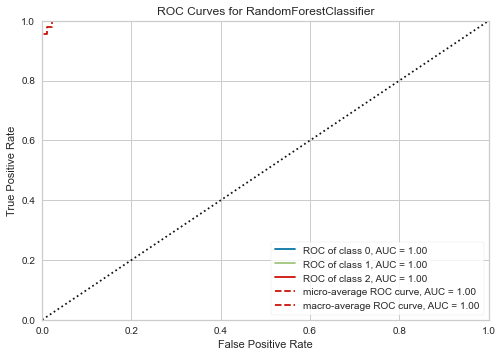

In [24]:
plot_model(rf)

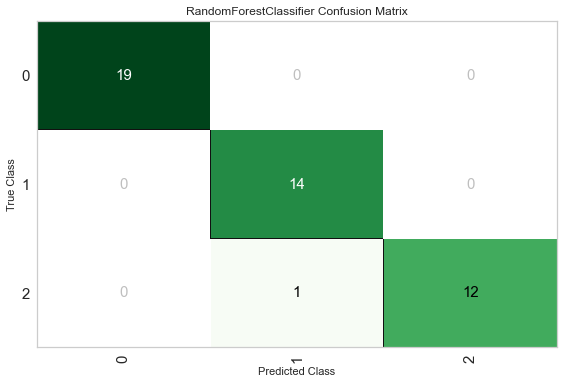

In [25]:
plot_model(rf, 'confusion_matrix' )

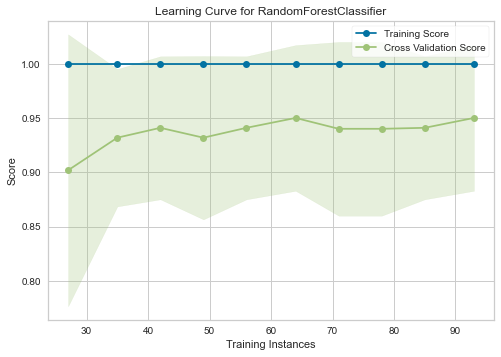

In [15]:
plot_model (rf, 'learning')

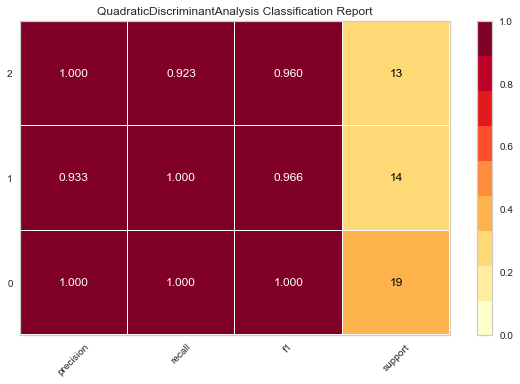

In [26]:
plot_model (qda, 'class_report')

#### Model interpretation with SHAP 

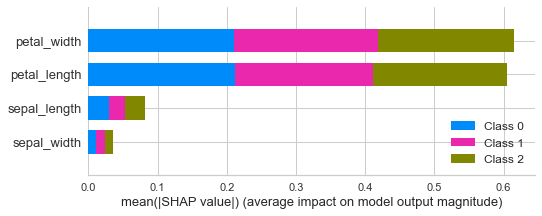

In [28]:
interpret_model(rf)

#### Predictions

In [29]:
predictions = predict_model (qda)

#### Model saving and loading 

In [30]:
finalize_model(qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [32]:
save_model (qda, 'qda_iris')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='species')),
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'),

In [ ]:
# To load trained models 

In [33]:
model = load_model ('qda_iris')

Transformation Pipeline and Model Successfully Loaded


### Regression 

#### Dataset loading and preparation

In [35]:
import pandas as pd

In [37]:
df = pd.read_csv('RealEstate.csv')
df.head()

No  X1 transaction date  X2 house age  ...  X5 latitude  X6 longitude  Y house price of unit area
0   1             2012.917          32.0  ...     24.98298     121.54024                        37.9
1   2             2012.917          19.5  ...     24.98034     121.53951                        42.2
2   3             2013.583          13.3  ...     24.98746     121.54391                        47.3
3   4             2013.500          13.3  ...     24.98746     121.54391                        54.8
4   5             2012.833           5.0  ...     24.97937     121.54245                        43.1

[5 rows x 8 columns]

In [38]:
df.drop(['No', 'X1 transaction date'], axis=1, inplace=True)
df.columns = ['Age', 'DistanceToMTR', 'NumStores', 'Latitude', 'Longitude', 'UnitPrice']
df.head()

Age  DistanceToMTR  NumStores  Latitude  Longitude  UnitPrice
0  32.0       84.87882         10  24.98298  121.54024       37.9
1  19.5      306.59470          9  24.98034  121.53951       42.2
2  13.3      561.98450          5  24.98746  121.54391       47.3
3  13.3      561.98450          5  24.98746  121.54391       54.8
4   5.0      390.56840          5  24.97937  121.54245       43.1

In [39]:
import matplotlib.pyplot as plt

(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([  7.6 ,  18.59,  29.58,  40.57,  51.56,  62.55,  73.54,  84.53,
         95.52, 106.51, 117.5 ]),
 <BarContainer object of 10 artists>)

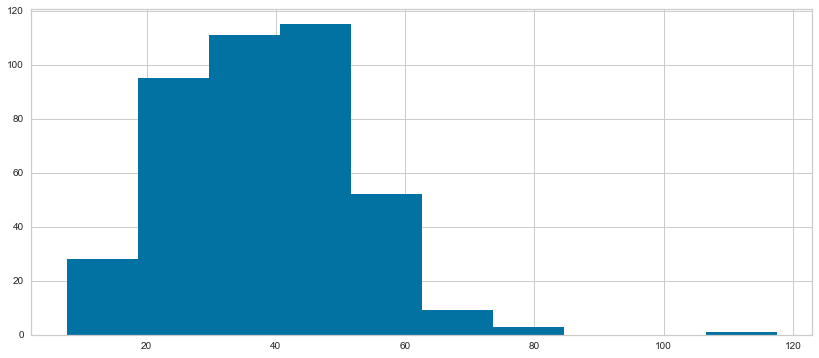

In [40]:
plt.figure(figsize=(14, 6))
plt.hist(df['UnitPrice'])

In [41]:
df = df[df['UnitPrice'] <= 70]

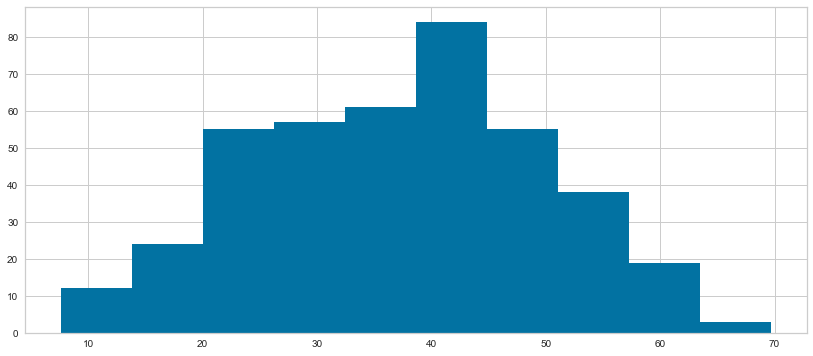

In [42]:
plt.figure(figsize=(14, 6))
plt.hist(df['UnitPrice']);

#### Model setup

In [44]:
from pycaret.regression import *

exp_reg = setup(df, target='UnitPrice')

In [45]:
compare_models()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=309, verbose=0, warm_start=False)

#### Create the selected model

In [48]:
rf = create_model('rf')

#### Model Tuning 

In [49]:
tuned_model = tune_model(rf)

#### Model visualization and evaluation

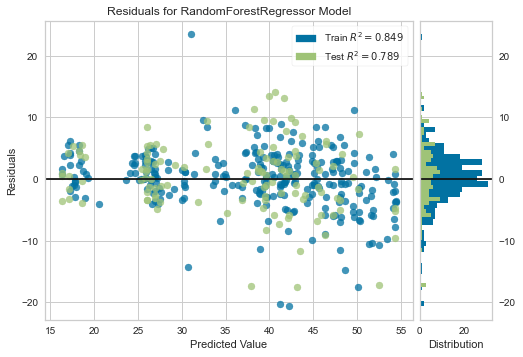

In [51]:
plot_model(tuned_model)

In [52]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

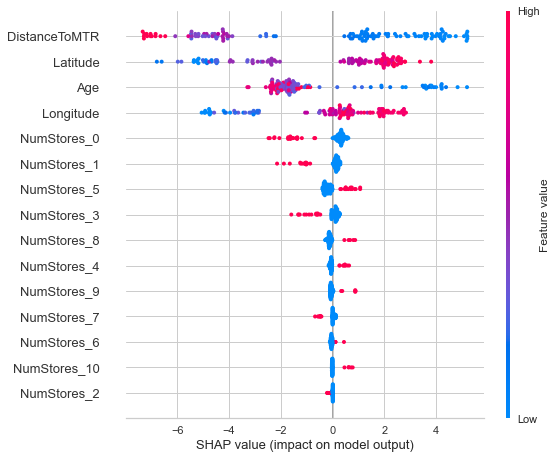

In [53]:
interpret_model(tuned_model)

#### Evaluation and saving

In [54]:
predictions = predict_model(tuned_model)

In [55]:
finalize_model(tuned_model)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.01,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=-1, oob_score=False,
                      random_state=309, verbose=0, warm_start=False)

In [56]:
save_model(tuned_model, 'realestate_rf')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='UnitPrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                        criterion='mse', max_depth=8,
                                        max_features='sqrt', max_leaf_nodes=None,
                                        max_samples=None,
                               